In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company=pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
label_encoder=preprocessing.LabelEncoder()
x=company["ShelveLoc"]=label_encoder.fit_transform(company['ShelveLoc'])
x=company["Urban"]=label_encoder.fit_transform(company['Urban'])
x=company["US"]=label_encoder.fit_transform(company['US'])

In [4]:
daf=pd.DataFrame(company.Sales)                             #output or dependent variable should always be catrgorical in decesion tree so converting sale data to catrgorical values
daf.loc[company['Sales']<=10,'good sale or not']='NOT'         
daf.loc[company['Sales']>10,'good sale or not']='GOOD SALE'
z= daf
z

,Sales,good sale or not
0,9.50,NOT
1,11.22,GOOD SALE
2,10.06,GOOD SALE
3,7.40,NOT
4,4.15,NOT
...,...,...
395,12.57,GOOD SALE
396,6.14,NOT
397,7.41,NOT
398,5.94,NOT


In [5]:
company.insert(11, "Sale_status",z['good sale or not'])

In [6]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale_status
0,9.50,138,73,11,276,120,0,42,17,1,1,NOT
1,11.22,111,48,16,260,83,1,65,10,1,1,GOOD SALE
2,10.06,113,35,10,269,80,2,59,12,1,1,GOOD SALE
3,7.40,117,100,4,466,97,2,55,14,1,1,NOT
4,4.15,141,64,3,340,128,0,38,13,1,0,NOT
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,GOOD SALE
396,6.14,139,23,3,37,120,2,55,11,0,1,NOT
397,7.41,162,26,12,368,159,2,40,18,1,1,NOT
398,5.94,100,79,7,284,95,0,50,12,1,1,NOT


In [7]:
x=company.iloc[:,1:11]
y=company['Sale_status']

In [8]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [9]:
y 

0            NOT
1      GOOD SALE
2      GOOD SALE
3            NOT
4            NOT
         ...    
395    GOOD SALE
396          NOT
397          NOT
398          NOT
399          NOT
Name: Sale_status, Length: 400, dtype: object

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [11]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

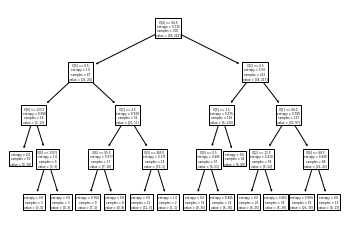

In [12]:
tree.plot_tree(model);

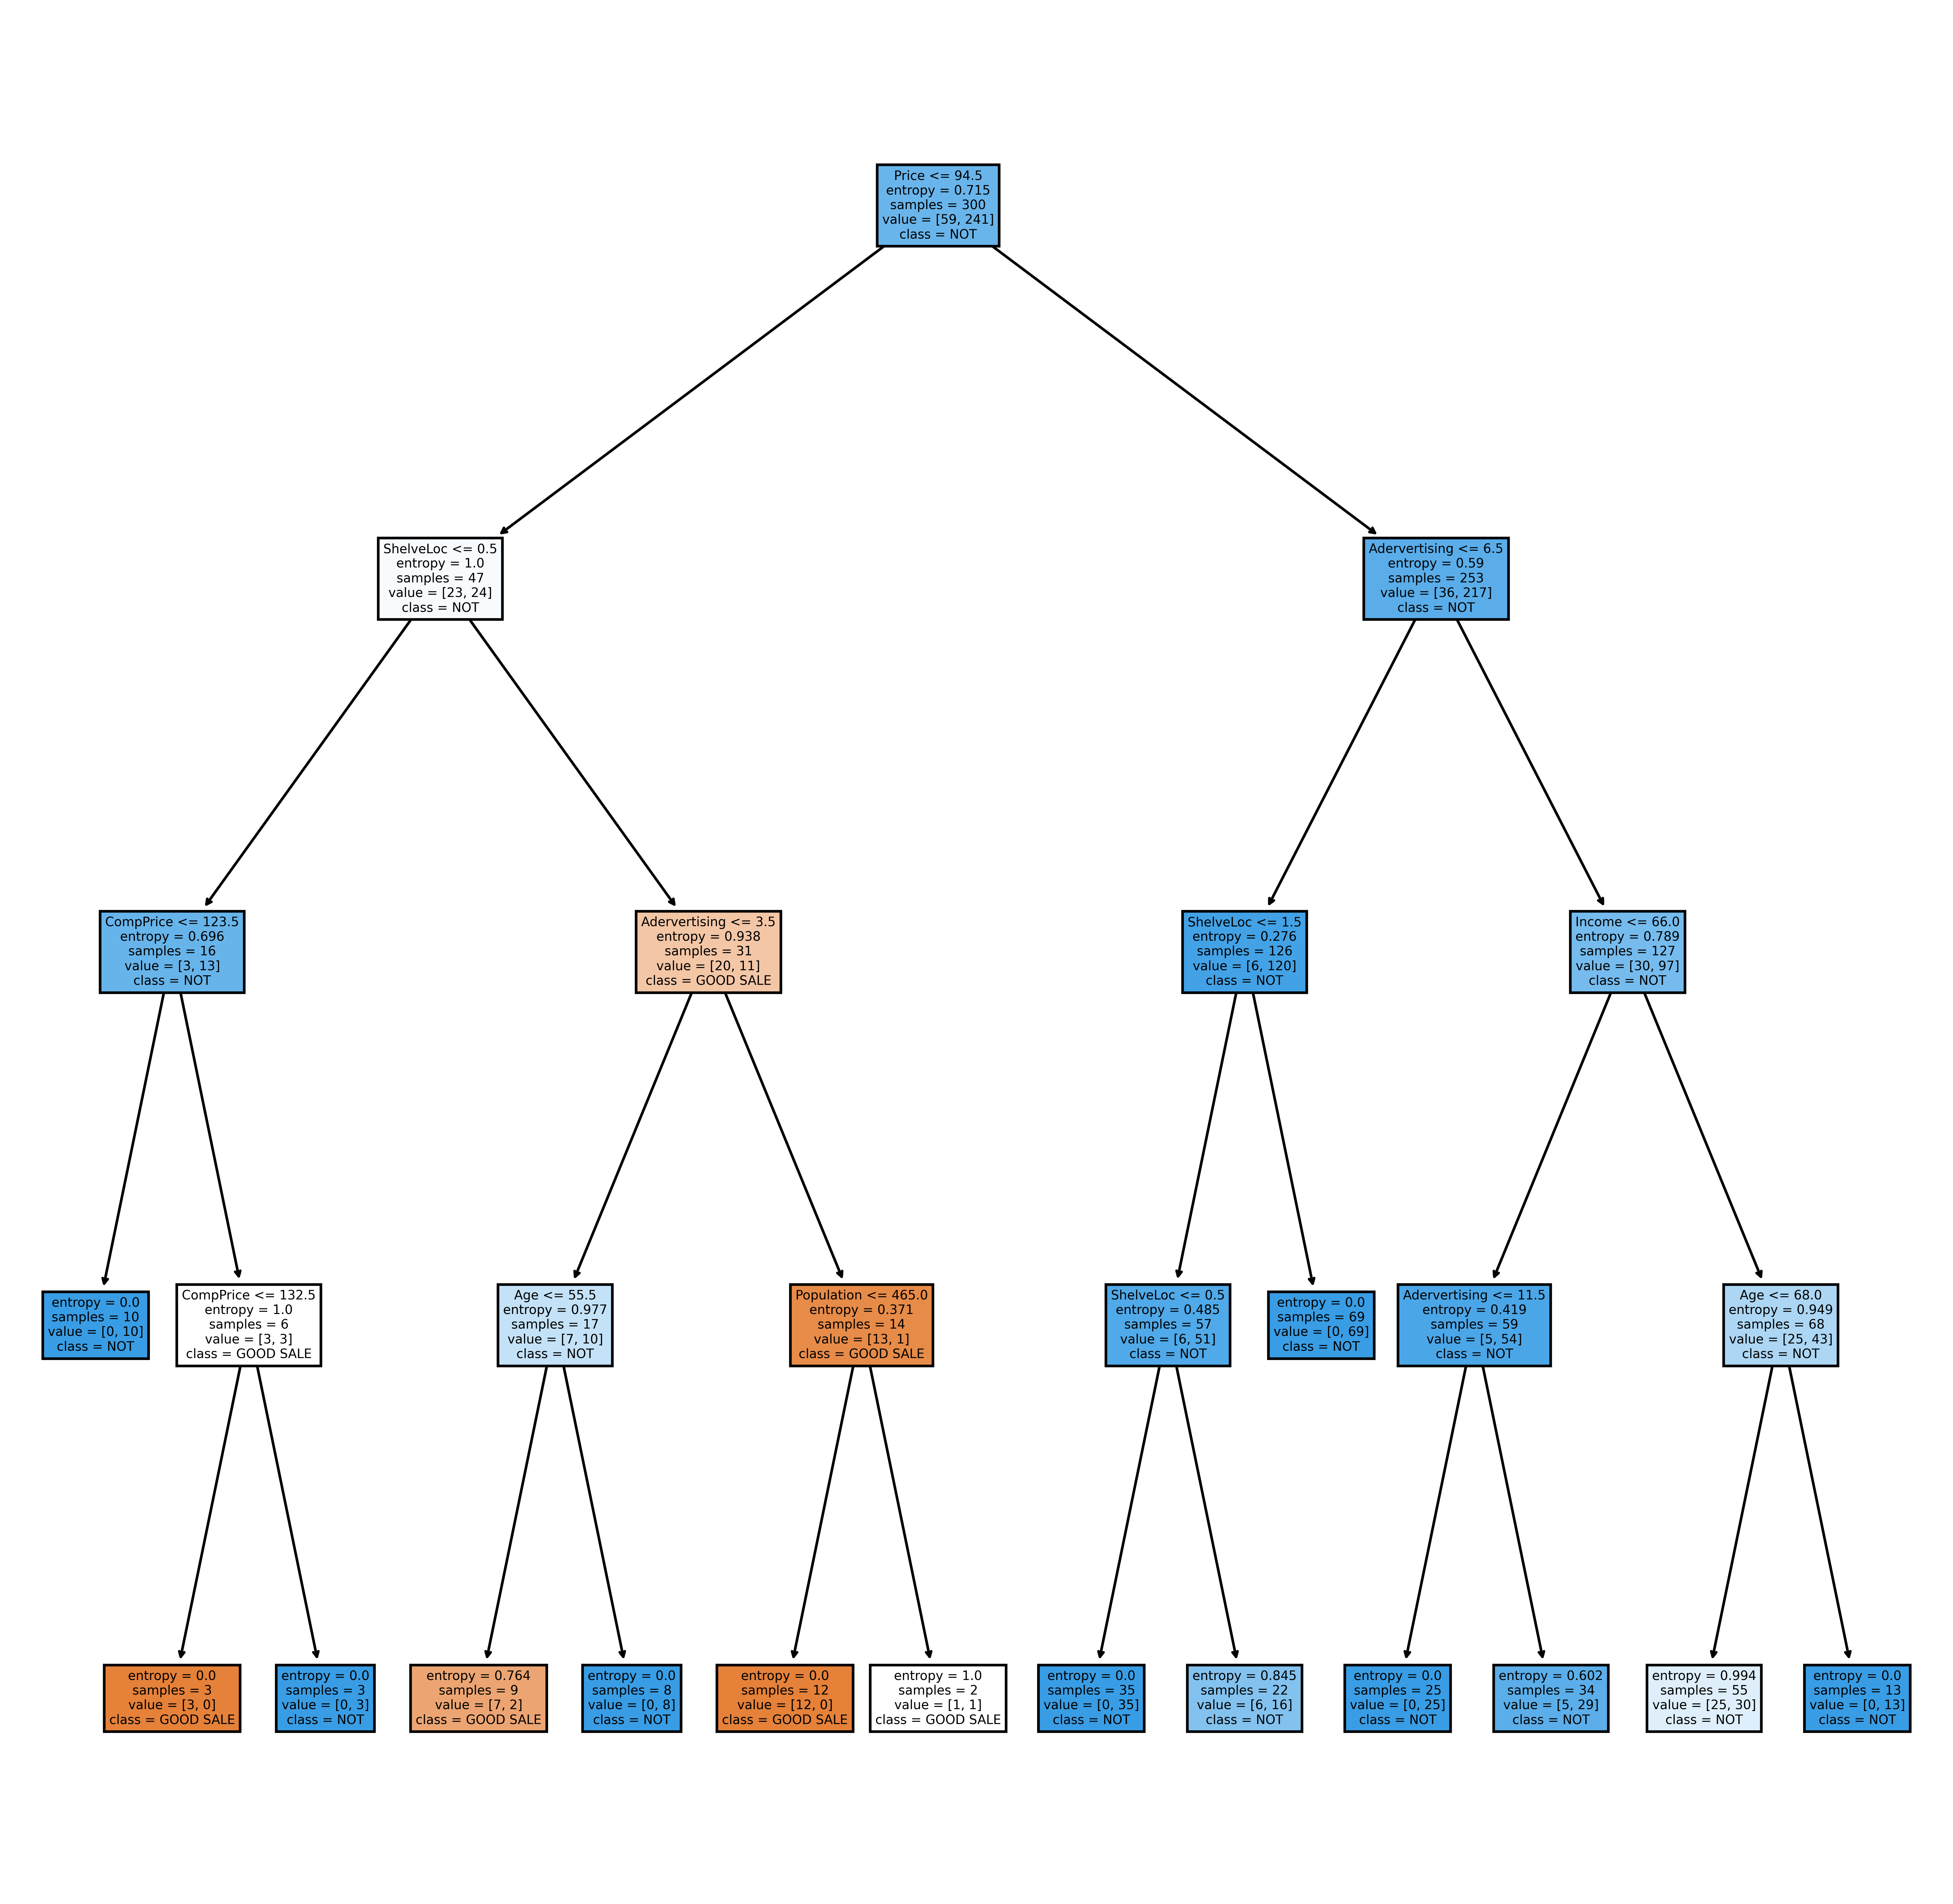

In [13]:
fn=['CompPrice','Income','Adervertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['GOOD SALE','NOT']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (13,13), dpi=600)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [14]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

NOT          86
GOOD SALE    14
dtype: int64

In [15]:
preds

array(['NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'GOOD SALE',
       'NOT', 'GOOD SALE', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT',
       'NOT', 'NOT', 'NOT', 'NOT', 'GOOD SALE', 'GOOD SALE', 'NOT', 'NOT',
       'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'GOOD SALE', 'NOT',
       'GOOD SALE', 'NOT', 'NOT', 'GOOD SALE', 'NOT', 'NOT', 'NOT', 'NOT',
       'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT',
       'NOT', 'NOT', 'NOT', 'GOOD SALE', 'NOT', 'NOT', 'GOOD SALE', 'NOT',
       'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'GOOD SALE', 'NOT', 'NOT',
       'NOT', 'NOT', 'NOT', 'NOT', 'GOOD SALE', 'GOOD SALE', 'GOOD SALE',
       'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT',
       'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT',
       'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'GOOD SALE',
       'NOT', 'NOT'], dtype=object)

In [16]:
pd.crosstab(y_test,preds)

col_0,GOOD SALE,NOT
Sale_status,,
GOOD SALE,10,9
NOT,4,77


In [17]:
np.mean(preds==y_test)

0.87

In [18]:
from sklearn.tree import DecisionTreeRegressor


In [19]:
array=company.values
x=array[:,0:11]
y=array[:,5]

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [21]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()